# Introduction 

Imagine you are a member of an analytics team that provides insights for an association of zoos and aquariums. You have been assigned to a project focusing on Adelie and Chinstrap penguins, as these particular species have been in [decline](https://www.scientificamerican.com/article/gentoo-penguins-thrive-while-adelies-and-chinstraps-falter-in-a-climate-changed-world/). 

In this activity, you will conduct simple linear regression on a relevant dataset.

# Imports and Data Loading

### In this section, let's first import relevant Python libraries and modules.
This includes `pandas`, `pyplot`, `seaborn`, `ols`, and `statsmodels` api.

In [8]:
# Import libraries and modules

## YOUR CODE HERE ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Now let's load the penguins dataset into a DataFrame.
Let's work with the penguins dataset provided by the seaborn library.

In [9]:
# Load data

## YOUR CODE HERE ###

penguins = sn.load_dataset("penguins")

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

# Data Exploration and Cleaning

### Let's take a look at the data.

In [ ]:
# Take a look at the data 

## YOUR CODE HERE ###

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Question 1:
What do you observe about the different aspects of penguins shown in the data?
- The data shows species, island, bill length in millimeters, bill depth in millimeters, flipper length in millimeters, body mass in grams, and sex for each penguin represented. 

### Let's identify the number of rows and the number of columns in the data.

In [ ]:
# Identify the number of rows and the number of columns in the data

## YOUR CODE HERE ###

penguins.shape

(344, 7)

### Question 2:
What do you observe about the number of rows and the number of columns in the data?
- There are 344 rows and 7 columns in the data. This means that 344 penguins are represented in the data, and the data contains 7 aspects of each penguin.

### Let's check for missing values in the rows of the data.

In [ ]:
penguins.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
penguins.isna().any(axis=1)

NameError: name 'penguins' is not defined

In [ ]:
# How many rows with missing values

## YOUR CODE HERE ###

penguins.isna().any(axis=1).sum()

11

In [ ]:
# Proportion of rows with missing values to the total rows

11/344

0.03197674418604651

### Question 3:
What do you observe about the number of rows with missing values?
- There are 11 rows with missing values, which is not that many, considering the total number of rows.

### Let's drop the rows with missing values. 
This an important step in data cleaning, as it makes the data more usable for the next steps of analysis and regression. 

In [ ]:
# Drop the rows with missing values
# Update data

## YOUR CODE HERE ###

penguins = penguins.dropna(axis=0)

# Check to make sure that the data does not contain any missing values now

## YOUR CODE HERE ###

penguins.isna().any(axis=1).sum()

0

### Let's filter the data to only include Adelie and Chinstrap penguin species.
This is another important step in data cleaning, as those species are the focus of your project.

In [ ]:
# Filter data so that it only contains rows where the species is either Adelie or Chinstrap
# Update data with result

penguins = penguins[(penguins["species"] == "Adelie") | (penguins["species"] == "Chinstrap")]

# Take a look at the data now

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
penguins.shape

(214, 7)

# Exploratory Data Analysis and Regression
Let's say you want to explore the relationship between penguins' **flipper length** and **body mass**, as that could help you gain insight on penguins' needs. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

### Linearity

Let's check if the assumption of linearity is met. 

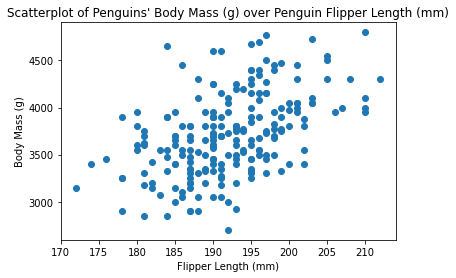

In [ ]:
# Check if linearity assumption is met

### YOUR CODE HERE

plt.scatter(penguins["flipper_length_mm"], penguins["body_mass_g"])
plt.title("Scatterplot of Penguins' Body Mass (g) over Penguin Flipper Length (mm)")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

##### Hint 1:

A scatter plot can be used to check if the linearity assumption is met.

##### Hint 2:

You can use the `scatter` function from the matplotlib.pyplot library or the `scatterplot` function from the seaborn library to create a scatter plot. 

### Question 4:
What do you observe from the scatter plot?
- The points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it looks like the assumption of linearity is met.

### Normality
Let's check if both flipper length and body mass are normally distributed (or close to being normally distributed). If they are, then it is likely that the residuals are also normally distributed, which you can check after you build the model.

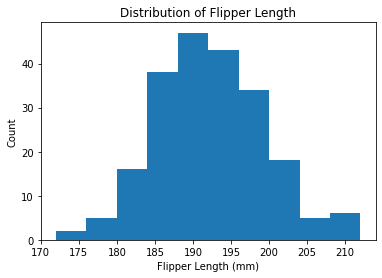

In [ ]:
# Check if flipper length is normally distributed

### YOUR CODE HERE

plt.hist(penguins["flipper_length_mm"])
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.show()

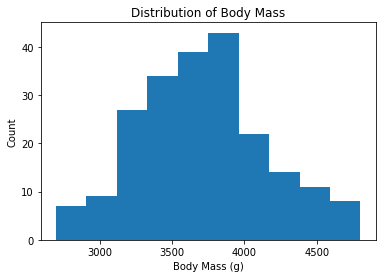

In [ ]:
# Check if body mass is normally distributed

### YOUR CODE HERE

plt.hist(penguins["body_mass_g"])
plt.title("Distribution of Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.show()

##### Hint 1:

A histogram can be used to visualize the distribution of a variable.

##### Hint 2:

You can use the `hist` function from the matplotlib.pyplot library or the `histplot` function from the seaborn library to create a scatter plot. 

### Question 5: 
What do you observe about the distribution of flipper length and the distribution of body mass?
- Both the distribution of flipper length and the distribution of body mass look approximately normal.

### Independence
Let's check if the assumption of independent observations is met by considering the context of what each entry in the data represents and how the data would have been collected.

### Question 6: 
Based on the context behind the data, do you think the independent observations assumption is met?
- Since each row of the data represents a distinct penguin, there is no indication that one penguin's flipper length and body mass is related to any other penguin's flipper length and body mass. So you can assume that the observations are independent of each other.   

# Build Model

### Let's start by selecting only the columns that are needed for the model that you will build from the data. 

In [ ]:
# Select relevant columns
# Save resulting dataframe in a separate variable to prepare for regression

### YOUR CODE HERE

ols_data = penguins[["flipper_length_mm", "body_mass_g"]]

# Take a look at the subset to make sure it looks right

### YOUR CODE HERE

ols_data

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
215,207.0,4000.0
216,202.0,3400.0
217,193.0,3775.0
218,210.0,4100.0


##### Hint 1:

Make sure to get the columns that correspond to flipper length and body mass.

##### Hint 2:

You can use a pair of double square brackets to select a subset of a dataframe.

### Let's write the linear regression formula for modeling the relationship between body mass and flipper length.

In [ ]:
# Write the linear regression formula
# Save it in a variable

### YOUR CODE HERE

ols_formula = "body_mass_g ~ flipper_length_mm"

# Take a look at the formula to make sure it looks right

### YOUR CODE HERE

ols_formula

'body_mass_g ~ flipper_length_mm'

##### Hint 1:

Save the formula as string.

##### Hint 2:

Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

### Let's implement the Ordinary Least Squares (OLS) approach for linear regression. 

In [ ]:
# Implement OLS

### YOUR CODE HERE

OLS = ols(formula = ols_formula, data = ols_data)

##### Hint 1:

There is a function from the statsmodels library that can be used to implement OLS.

##### Hint 2:

You can use the `ols` function from the statsmodels library.

### Let's create a linear regression model for the data, fit the model to the data.

In [ ]:
# Fit the model to the data
# Save the fitted model in a variable

### YOUR CODE HERE

model = OLS.fit()

##### Hint 1:

There is a function from the statsmodels library that can be used to fit the model.

##### Hint 2:

You can use the `fit` function from the statsmodels library

### Let's get a summary of the results from the model.

In [ ]:
# Get summary of results 

### YOUR CODE HERE

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     66.14
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.50e-14
Time:                        14:13:21   Log-Likelihood:                -1574.5
No. Observations:                 214   AIC:                             3153.
Df Residuals:                     212   BIC:                             3160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1935.0444    695.188     -2.783      0.006   -3305.410    -564.678
flipper_length_mm    29.4380      3.620      8.133      0.000      22.303      36.573
==============================================================================
Omnibus:                        3.438   Durbin-Watson:                   2.567
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.339
Skew:                           0.306   Prob(JB):                        0.188
Kurtosis:                       2.976   Cond. No.                     5.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Hint 1:

There is a function from the statsmodels library that can be used to get the summary of results from a model.

##### Hint 2:

You can use the `summary` function from the statsmodels library here.

### Let's take a look at the bottom table from the results summary. 
Based on that table, let's identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope. 

### Question 7: 
What is the y-intercept?
- The y-intercept is -1935.0444.

### Question 8:
What is the slope?
- The slope is 29.4380.

### Question 9:
What is the linear equation you would write to express the relationship between body mass and flipper length in the form of y = slope * x + y-intercept.
- body mass = 29.4380 * flipper length - 1935.0444

### Question 10:
What do you think the slope in this context means?
- One interpretation: If a penguin's flipper gets 1 millimeter longer, the penguin's body mass will increase by 29.4380 grams on average. 
- Another interpretation: Penguins with 1 millimeter longer flippers have 29.4380 grams higher body mass on average. 

# Finish checking model assumptions 

### Normality Continued

#### Check if the residuals are normally distributed.

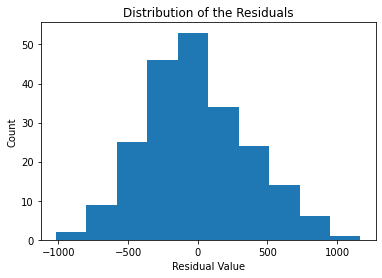

In [ ]:
# Get the residuals from the model

### YOUR CODE HERE

residuals = model.resid

# Check if the residuals are normally distributed

### YOUR CODE HERE

plt.hist(residuals)
plt.title("Distribution of the Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

In [ ]:
residuals

0      356.760214
1      259.570043
2     -555.372264
4     -296.496196
5       -8.182093
          ...    
215   -158.628674
216   -611.438503
217     28.503804
218   -146.942776
219   -118.686366
Length: 214, dtype: float64

##### Hint 1:

There is a function in the statsmodels library that can be used to get residuals. You can create a histogram to visualize the distribution of a variable. 

##### Hint 2:

You can use the `resid` function from the statsmodels library to get the residuals. You can use the `hist` function from the matplotlib.pyplot module or the `histplot` function from the seaborn library to create a histogram.

### Question 11:
Based on the histogram above, what do you observe about the distribution of the residuals?
- Based on the histogram above, the distribution of the residuals is approximately normal. So it looks like the assumption of normaliy is met.

#### Confirm normality with a Q-Q plot.

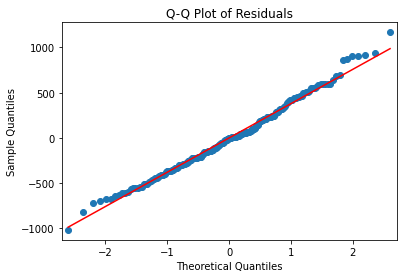

In [ ]:
# Create a Q-Q plot to confirm normality assumption 

### YOUR CODE HERE

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

##### Hint 1:

There is a function in the statsmodels library that can be used to create a Q-Q plot. You can create a Q-Q plot of the residuals to confirm if the normality assumption is met. 

##### Hint 2:

You can use the `qqplot` function from the statsmodels library to achieve this. 

### Question 12:
What do you observe about the Q-Q plot above?
- In the Q-Q plot above, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met

### Homoscedasticity
Check if the assumption of homoskedasticity is met.

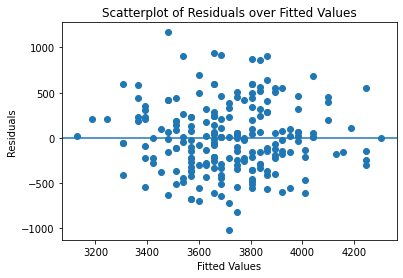

In [ ]:
# Get the X values

### YOUR CODE HERE

X = ols_data["flipper_length_mm"]

# Get the fitted values

### YOUR CODE HERE

fitted_values = model.predict(X)

# Create a scatter plot

### YOUR CODE HERE

plt.scatter(fitted_values, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals over Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
fitted_values

0      3393.239786
1      3540.429957
2      3805.372264
4      3746.496196
5      3658.182093
          ...     
215    4158.628674
216    4011.438503
217    3746.496196
218    4246.942776
219    3893.686366
Length: 214, dtype: float64

##### Hint 1:

There is a function in the statsmodels library that can be used to get fitted values. You can create a scatter plot to check for homoskedasticity.

##### Hint 2:

You can use the `predict` function from the statsmodels library to get the fitted values. You can create a scatter plot of the fitted values over the residuals to check for homoskedasticity.

### Question 13:
What do you observe from the scatter plot above?
- The points on the plot above resemble a random cloud. There is no clear pattern along the residual values. So it looks like the assumption of homoskedasticity is met.

# Conclusion

**Key Takeaways:**
- Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.
- The results of a linear regression model can be used to express the relationship between two variables along with measures of uncertainty. 

**Results Summary:**

In the simple linear regression model, the y-intercept is -1935.0444 and the slope is 29.4380. One interpretation: If a penguin's flipper gets 1 millimeter longer, the penguin's body mass will increase by 29.4380 grams on average. Another interpretation: Penguins with 1 millimeter longer flippers have 29.4380 grams higher body mass on average. 

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme as what is seen in the penguins dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between flipper length and body mass i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between flipper length and body mass i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between flipper length and body mass for Adelie and Chinstrap penguins. 

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 22.303 to 36.573. This indicates that there is a 95% probability that the interval [22.303, 36.573] contains the true value for the slope. 

**A story you could present to stakeholders:**

Based on the dataset at hand and regression analysis, there is a notable relationship between flipper length and body mass for Adelie and Chinstrap penguins, with a p-value of 0.000 and standard error of 3.620. For such penguins with 1 millimeter longer flippers, their body mass is  29.4380 grams more on average. If you are looking for insight that will help determine how to distribute food amongst penguins of these species at your zoo, consider the following: You could allocate resources so that penguins with longer flippers are fed larger servings proportional to their flipper length, to support/sustain their body mass. 